In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Height-Weight Data.csv') # Reading CSV file as data frame

In [3]:
df.head() # Showing data as tebler formate

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape # SHowing row and column size

(3501, 2)

# Ploting the Dataset

Text(0.5, 1.0, 'Height Weight Table')

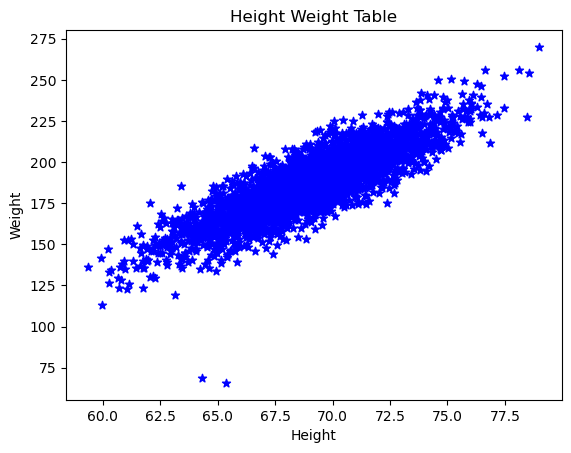

In [5]:
plt.scatter(df.Height, df.Weight, color = 'blue', marker = '*')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height Weight Table')

In [6]:
x = df.drop('Weight', axis = 1) #Seperating Height and Weight
y = df[['Weight']]

In [7]:
x.head() # Showing Height(x) Data

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [8]:
y.head() # Showing Weight (y) Data

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [9]:
x.mean() # CAlculating the mean of Height from dataset

Height    69.024411
dtype: float64

In [10]:
y.mean() # CAlculating the mean of Weight from dataset

Weight    186.891258
dtype: float64

# Dividing Dataset into training and test data 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train, test = train_test_split(df, test_size = .25)  #testing data=25%

In [13]:
train.shape # Showing the number of row and colomn as trining data (75%)

(2625, 2)

In [14]:
test.shape  # Showing the number of row and colomn as testing data (25%)

(876, 2)

In [15]:
train.head() # Showing Training Dataset

,Height,Weight
2781,70.349500,195.971477
3169,66.862725,173.532699
3366,65.504823,161.745071
3411,67.993995,187.695369
82,73.826127,237.916736


# Dividing dataset into training and test data and Seperating the height and the weight

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .25, random_state = 0)

In [17]:
xtrain.head() # Showing the Weight dataset seperately from Training Dataset

,Height
1310,67.847749
3153,65.215556
3333,63.873409
1002,69.156982
1765,68.503261


In [18]:
ytrain.head() # Showing the Height dataset seperately from Training Dataset

,Weight
1310,153.031321
3153,174.931143
3333,152.554620
1002,206.515190
1765,193.982059


# Implementing Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(xtrain, ytrain) # training the model

LinearRegression()

In [22]:
m = lr.coef_ # Calculating coefficient
m

array([[5.96613032]])

In [23]:
c = lr.intercept_  # Calculating intercept
c

array([-224.98706384])

In [24]:
yp = (m*66.862725)+c # Calculating Predicted Weight manually where height= 66.862725 and Actual weight(y)=173.532699 (row no = 3169)
yp

array([[173.92466721]])

In [25]:
lr.predict([[66.862725]]) # Calculating Predicted Weight using Linear Regression model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[173.92466721]])

In [26]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [27]:
df['predicted_Weight'] = lr.predict(x)
df.head()

,Height,Weight,predicted_Weight
0,73.847017,241.893563,215.593864
1,68.781904,162.310473,185.374740
2,74.110105,212.740856,217.163483
3,71.730978,220.042470,202.969301
4,69.881796,206.349801,191.936837


# Ploting the Actual Height-Weight and Height-Predicted_Weight Dataset

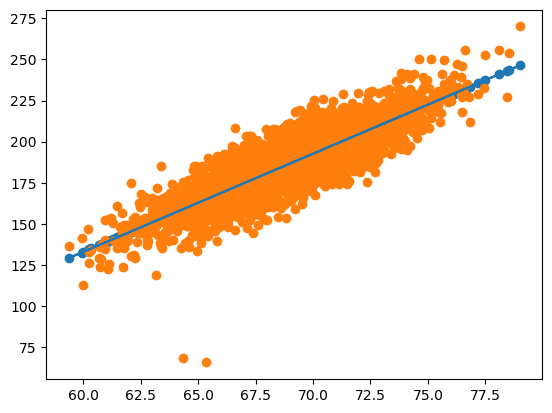

In [28]:
plt.plot(x, df[['predicted_Weight']])
plt.scatter(x, df[['predicted_Weight']])
plt.scatter(x, df[['Weight']])

# Calculating Error

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
mse = mean_squared_error(ytest, lr.predict(xtest)) # Calculating Maen Squared Error
mae = mean_absolute_error(ytest, lr.predict(xtest)) # Calculating Maen Absolute Error

In [31]:
mae

8.145588569833935

In [32]:
mse

103.70875574105973

In [33]:
lr.score(xtest, ytest) # Score from Testing Dataset

0.7400625947962998

# Ploting the Actual Traing dataset and Predicted training dataset

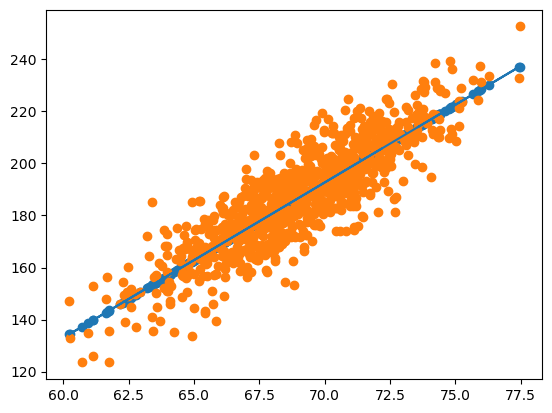

In [34]:
plt.plot(xtest, lr.predict(xtest))      
plt.scatter(xtest, lr.predict(xtest))
#plt.scatter(x, df[['rent']])
plt.scatter(xtest, ytest)